# Half Space classifier implemented using Perceptron Algorithm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing dataset

In [2]:
data = pd.read_csv("./dataset/diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Checking for any null values in the dataset


In [5]:
data.isnull().values.any()

False

In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data.columns = map(str.lower, data.columns)
data.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')

# Ploting the output of the target column

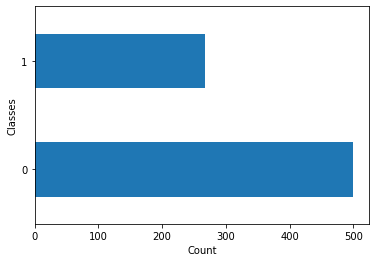

In [8]:
data['outcome'].value_counts().plot(kind = "barh") 
plt.xlabel("Count")
plt.ylabel("Classes")
plt.show()

# Ploting Correlation of features


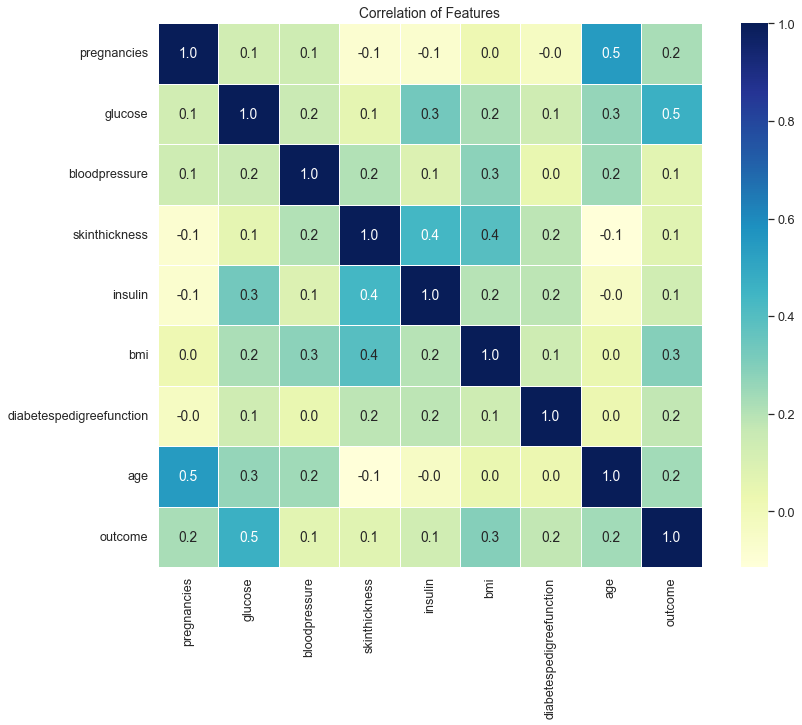

In [9]:
sns.set(font_scale = 1.15)
plt.figure(figsize = (14, 10))

sns.heatmap(data.corr(), vmax = 1, linewidths = 0.5, fmt= '.1f',
            square = True, annot = True, cmap = 'YlGnBu', linecolor = "white")
plt.title('Correlation of Features');

In [10]:
# perform scaling on the data
X = data.drop("outcome", axis = 1)
Y = data['outcome']

# Normalizing the data of feature columns between 0 to 1


In [11]:
# Normalization
# Normalization Formula; (x - min(x))/max(x)-min(x)

Y = data.outcome.values
X = data.drop(["outcome"], axis = 1)
X = (X - np.min(X))/(np.max(X)-np.min(X)).values
X.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


# Train & Test Split (70:30)

In [12]:
# Train & Test Split (in 70:30 , i.e. 70% training, 30% testing)
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

print("features: ", X_train.shape)
print("labels: ", Y_train.shape)
print("test_features: ", X_test.shape)
print("test_labels: ", Y_test.shape)

features:  (537, 8)
labels:  (537,)
test_features:  (231, 8)
test_labels:  (231,)


# Perceptron Algorithm

In [13]:
class PerceptronAlgorithm:
    def __init__(self, l_rate=0.01, n_itr=1000):
        self.lr = l_rate
        self.n_itr = n_itr
        self.activation_function = self._unit_step_function
        self.w = None
        self.b = None
    
    def _unit_step_function(self, x):
        return np.where(x >= 0, 1, 0)
    
    def predict(self, X):
        l_output = np.dot(X, self.w) + self.b
        y_predict = self.activation_function(l_output)
        return y_predict

    def fit(self, X, y):
       # print(X.values)
        samples, features = X.shape
        
        # init parameters
        self.w = np.zeros(features)
        self.b = 0

        y_ = np.array([1 if i > 0 else 0 for i in y])

        for _ in range(self.n_itr):
                for i, x_i in enumerate(X.values):
                    linear_output = np.dot(x_i, self.w) + self.b
                    y_pred = self.activation_function(linear_output)

                    # Perceptron update rule
                    update = self.lr * (y_[i] - y_pred)

                    self.w += update * x_i
                    self.b += update 


# Predicting the accuracy of test data

In [14]:

    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

    p = PerceptronAlgorithm(l_rate=0.01, n_itr=300)
    p.fit(X_train, Y_train)
    prediction_train = p.predict(X_train)
    print("Perceptron classification Training accuracy: ", accuracy(Y_train, prediction_train))

Perceptron classification Training accuracy:  0.7746741154562383


In [15]:
prediction_test = p.predict(X_test)
print("Perceptron classification accuracy: ", accuracy(Y_test, prediction_test)) 

Perceptron classification accuracy:  0.7229437229437229
